In [92]:
!pip install keras-tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
import tensorflow as tf


In [94]:
import kerastuner
import matplotlib.pyplot as plt
import numpy as np



In [95]:
tf.__version__



'2.11.0'

In [96]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [97]:
x_train.shape


(60000, 28, 28)

In [98]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

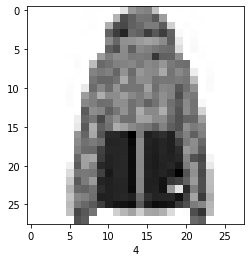

In [99]:
plt.imshow(x_train[22],cmap='binary')
plt.xlabel(y_train[22])
plt.show()

In [100]:
from keras.api._v2.keras.layers import Lambda
def create_model(hp):
  num_hidden_layers = 1
  num_units=8
  dropout_rate=0.1
  learning_rate=0.01
   
  if hp:
    num_hidden_layers=hp.Choice('num_hidden_layers', values=[1,2,3])
    num_units= hp.Choice('num_units', values=[8,6,32])
    dropout_rate=0.01
    learning_rate=hp.Float('learning_rate',min_value=0.0001,max_value=0.01)



  model=tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
  model.add(tf.keras.layers.Lambda(lambda x: x/225.))


  for _ in range(0,num_hidden_layers):
    model.add(tf.keras.layers.Dense(num_units, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(10,activation='softmax'))

  model.compile(
      
      loss='sparse_categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=['accuracy']
  )
  return model

In [101]:
create_model(None).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 lambda_1 (Lambda)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 6280      
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [102]:
class CustomTuner(kerastuner.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    kwargs['batch_size']=trial.hyperparameters.Int('batch_size',32,128,step=32)
    super(CustomTuner,self).run_trial(trial, *args, **kwargs)
    metrics=['accuracy']

In [103]:
tuner= CustomTuner(
    create_model,
    objective='val_accuracy',
    max_trials=20,
    directory='logs',
    project_name='fashion_mnist',
    overwrite=True
    

)

In [104]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
num_units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 6, 32], 'ordered': True}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}
